# Problem Statement 1

Write Load the "Country-data.csv" dataset into a DataFrame and perform the followingtasks:

1.Create a seperateDataFrame with only numeric data by remove the "country"column

2.Scale the data using the Standard Scaler to create a scaled DataFrame

3.Plotting dendograms with the complete linkage method

4.Creating cluster labels using cut tree

5.Perform the 4-Component PCA on DataFrame

6.Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Task 1: Load the "Country-data.csv" dataset into a DataFrame
df = pd.read_csv("C:\\Users\\King\\Desktop\\DSML Internship\\Assignments\\Assignment 5\\Assignment 5 Datasets\\Country-data.csv")
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Task 2: Create a separate DataFrame with only numeric data by removing the "country" column
numeric_df = df.drop(columns=["country"])
numeric_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
# Task 3: Scale the data using the Standard Scaler to create a scaled DataFrame
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if no

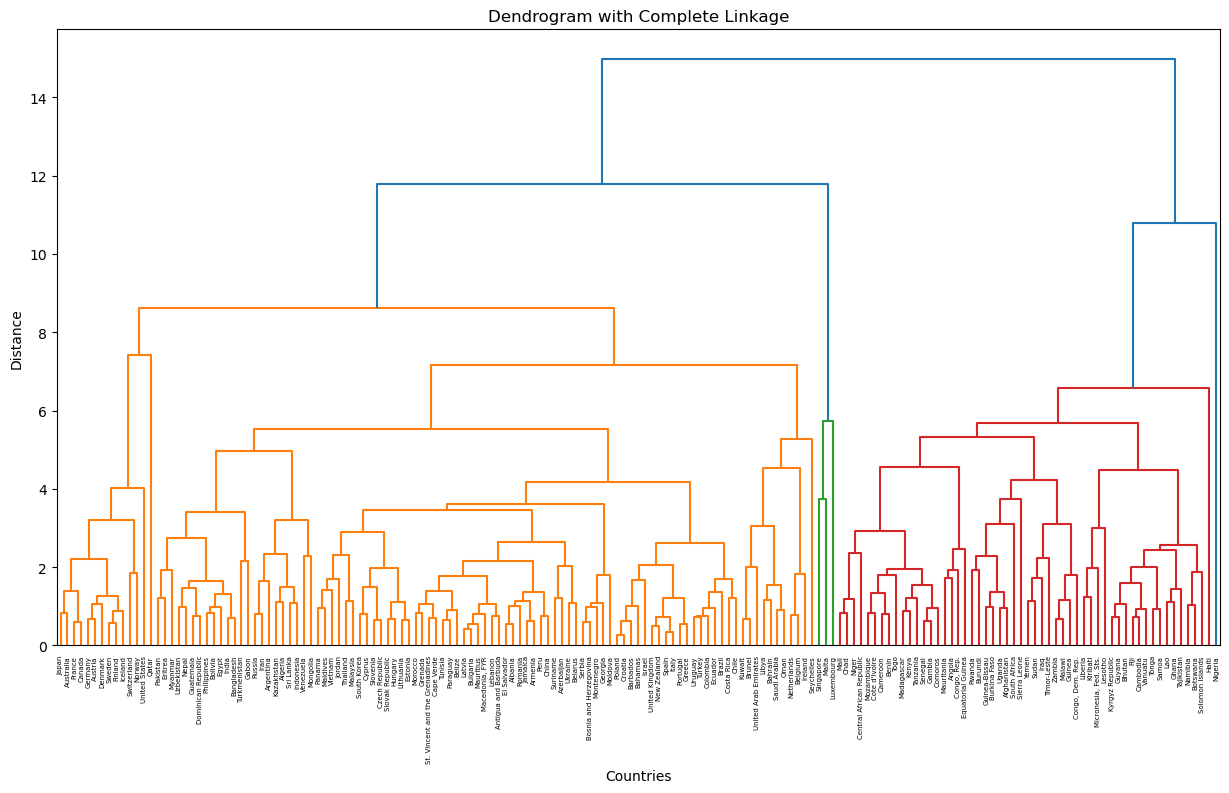

In [5]:
# Task 4: Plotting dendrograms with the complete linkage method
linkage_matrix = linkage(scaled_df, method='complete', metric='euclidean')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=df['country'].tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram with Complete Linkage')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

In [6]:
# Task 5: Creating cluster labels using cut_tree
num_clusters = 4
clusters = cut_tree(linkage_matrix, n_clusters=num_clusters).flatten()

df['Cluster'] = clusters

In [7]:
# Task 6: Perform the 4-Component PCA on DataFrame
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_df)

C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


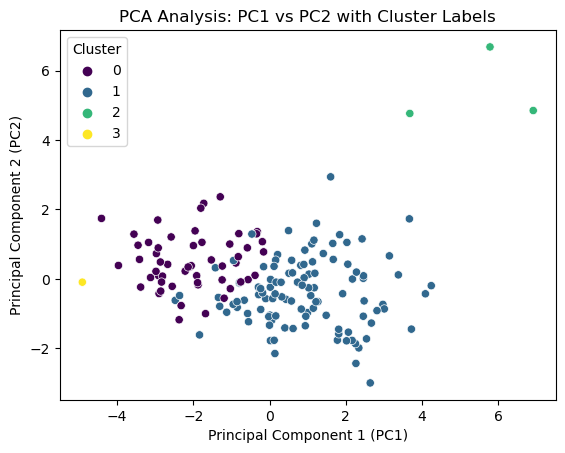

C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


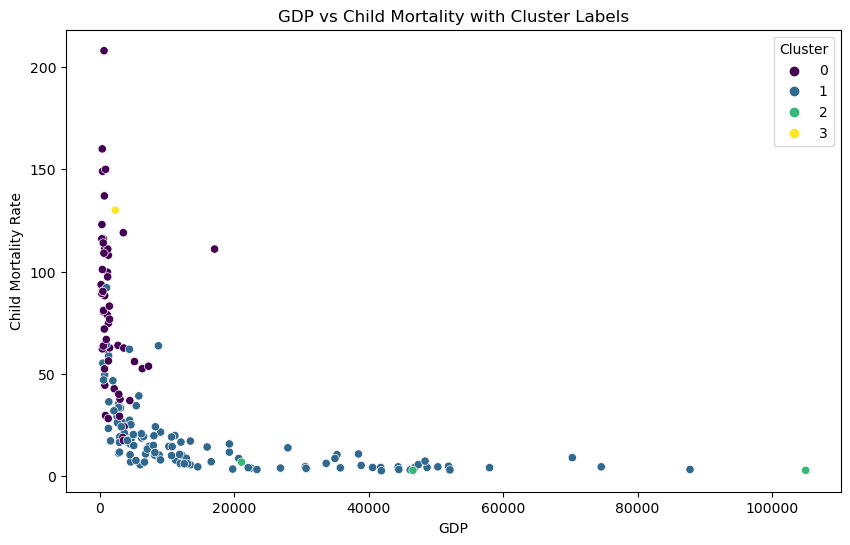

In [8]:
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

final_df = pd.concat([pca_df, df[['country', 'Cluster']]], axis=1)

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=final_df, palette='viridis', legend='full')
plt.title('PCA Analysis: PC1 vs PC2 with Cluster Labels')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('GDP vs Child Mortality with Cluster Labels')
plt.xlabel('GDP')
plt.ylabel('Child Mortality Rate')
plt.show()

# Problem Statement 2

Write a Python program that reads the “Credit Card Customer Data.csv”(provided on LMS) The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering.

Tasks to be performed:

1.Load the Given CSV file into a DataFrame

2.Find missing values and drop the unnecessary columns

3.Univariate and bivariate analysis

4.Standardize the whole dataset

5.Find the within-cluster sum of square

6.Find silhouette score

7.Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model

8.Observe Cluster behavior with different columns

9.Print Co-ordinates of all centroids and silhouette scores for the final model

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [10]:
# Task 1: Load the Given CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\King\\Desktop\\DSML Internship\\Assignments\\Assignment 5\\Assignment 5 Datasets\\Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [11]:
# Task 2: Find missing values and drop unnecessary columns
df.dropna(inplace=True)

C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


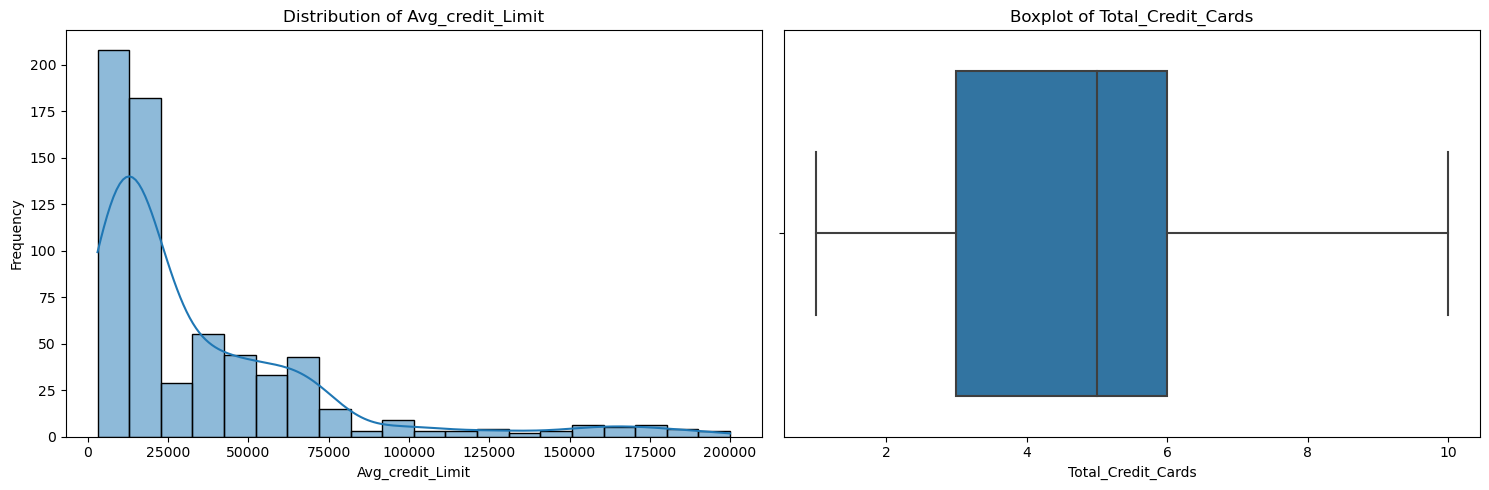

C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


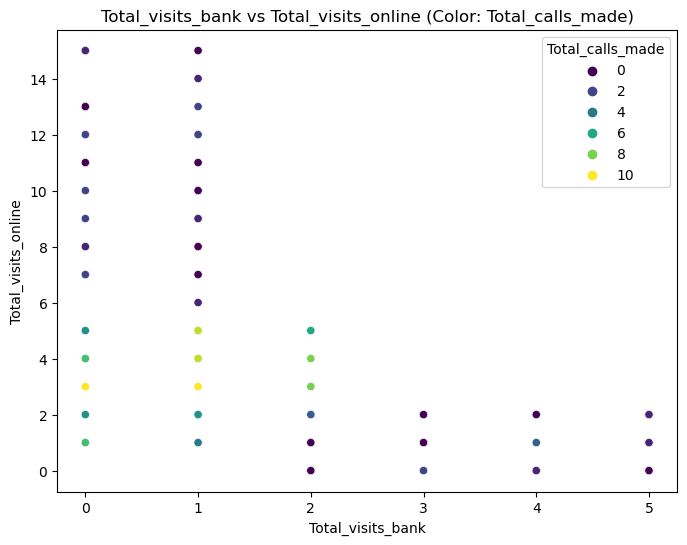

In [12]:
# Task 3: Univariate and Bivariate Analysis

# Univariate Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Avg_Credit_Limit'], bins=20, kde=True)
plt.title('Distribution of Avg_credit_Limit')
plt.xlabel('Avg_credit_Limit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Credit_Cards'])
plt.title('Boxplot of Total_Credit_Cards')
plt.xlabel('Total_Credit_Cards')
plt.tight_layout()
plt.show()

# Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_visits_bank', y='Total_visits_online', data=df, hue='Total_calls_made', palette='viridis')
plt.title('Total_visits_bank vs Total_visits_online (Color: Total_calls_made)')
plt.xlabel('Total_visits_bank')
plt.ylabel('Total_visits_online')
plt.legend(title='Total_calls_made')
plt.show()

In [13]:
# Task 4: Standardize the whole dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
plt.show()

C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if no

In [14]:
# Task 5: Find the within-cluster sum of square
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

In [15]:
# Task 6: Find silhouette score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))

C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

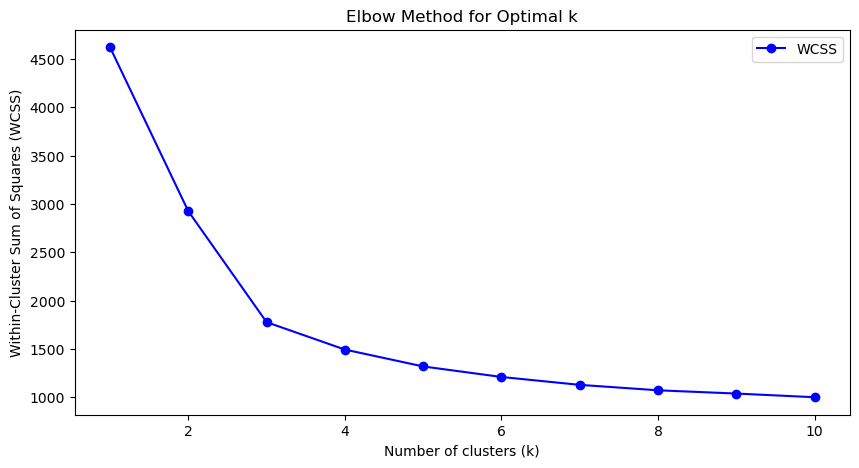

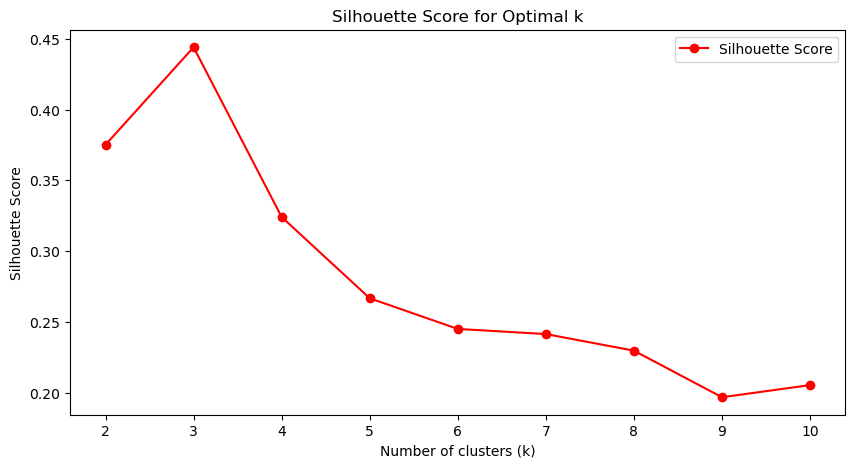

In [16]:
# Task 7: Use a line plot to find the best size for the cluster
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', label='WCSS')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='-', color='r', label='Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

C:\Users\King\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\King\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

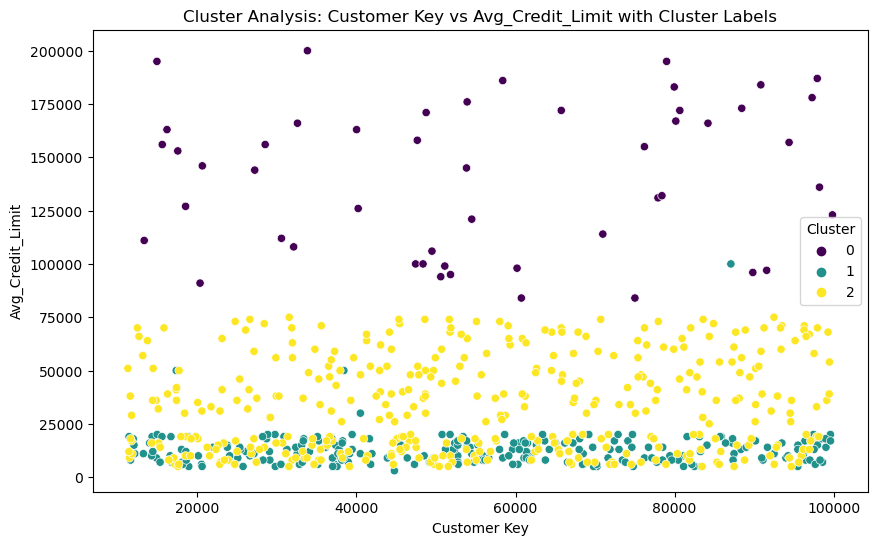

In [17]:
# Task 8: Observe Cluster behavior with different columns
best_k = 3 
final_model = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
final_model.fit(df_scaled)

df['Cluster'] = final_model.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer Key', y='Avg_Credit_Limit', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('Cluster Analysis: Customer Key vs Avg_Credit_Limit with Cluster Labels')
plt.xlabel('Customer Key')
plt.ylabel('Avg_Credit_Limit')
plt.show()

In [18]:
# Task 9: Observe Cluster behavior with different columns
df['Cluster'] = final_model.labels_

# Print Co-ordinates of all centroids
print("Coordinates of Centroids:")
centroids = scaler.inverse_transform(final_model.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=df.columns[:-1])
print(centroids_df)

# Print silhouette score for the final model
print("Silhouette Score for the Final Model:", silhouette_score(df_scaled, final_model.labels_))

Coordinates of Centroids:
        Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0  611.280000  56708.760000     141040.000000            8.740000   
1  115.460177  55072.902655      12831.858407            2.433628   
2  420.500000  54977.705729      33507.812500            5.518229   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0           0.600000            10.900000          1.080000  
1           0.929204             3.535398          6.827434  
2           3.505208             0.979167          2.000000  
Silhouette Score for the Final Model: 0.44394092525170764


# Problem Statement 3

DBSCAN Clustering

Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:

1.Find the correlation among the all the columns and drop the column/s with the least correlation

2.Encode the "Gender" column using get_dummies() function

3.Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

4.Print the size of each cluster and also the size of outliers' cluster

5.Using a scatter plot shows how annual income corresponds to the spending rates of customers

Correlation Matrix:
                         Age  Annual Income (k$)  Gender_Male
Age                 1.000000           -0.012398     0.060867
Annual Income (k$) -0.012398            1.000000     0.056410
Gender_Male         0.060867            0.056410     1.000000

Dropped least correlated column: Age
Updated DataFrame:
     Annual Income (k$)  Spending Score (1-100)  Gender_Male
0                    15                      39         True
1                    15                      81         True
2                    16                       6        False
3                    16                      77        False
4                    17                      40        False
..                  ...                     ...          ...
195                 120                      79        False
196                 126                      28        False
197                 126                      74         True
198                 137                      18         True
199 

C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


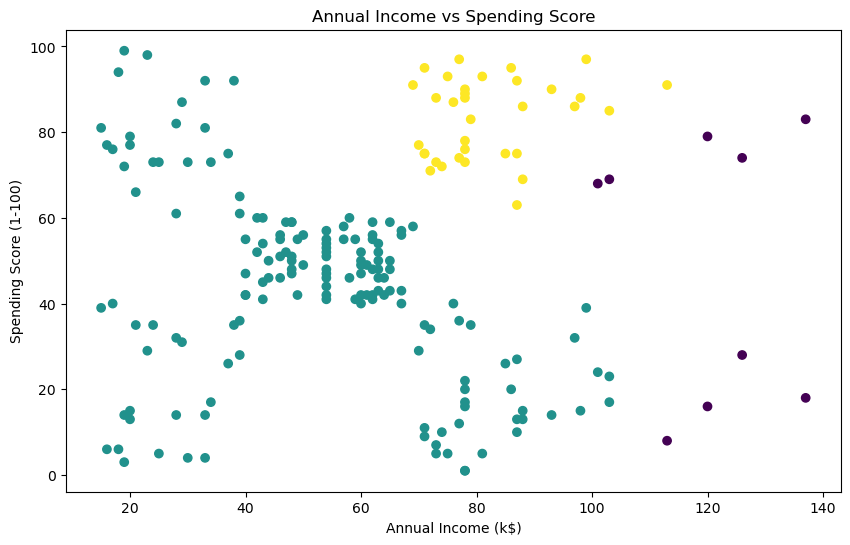

In [19]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Task 1: Load the dataset
df = pd.read_csv("C:\\Users\\King\\Desktop\\DSML Internship\\Assignments\\Assignment 5\\Assignment 5 Datasets\\Mall_Customers.csv")

#Drop unnecessary columns
df = df.drop(['CustomerID'], axis=1)

# Task 2: Encode the "Gender" column
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Task 3: Display the correlation matrix excluding the target column
correlation_matrix = df_encoded.drop(['Spending Score (1-100)'], axis=1).corr()
print("Correlation Matrix:")
print(correlation_matrix)
 

# Drop the column with the least correlation
least_correlated_column = correlation_matrix.abs().min().idxmin()
df_encoded = df_encoded.drop(least_correlated_column, axis=1)
print(f"\nDropped least correlated column: {least_correlated_column}")
print("Updated DataFrame:")
print(df_encoded)

# Task 5: Perform DBSCAN clustering
dbscan = DBSCAN(eps=12.5, min_samples=4)
df_encoded['Cluster'] = dbscan.fit_predict(df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']])

# Task 6: Print the size of each cluster and the size of the outliers' cluster
cluster_sizes = df_encoded['Cluster'].value_counts()
outliers_size = cluster_sizes[cluster_sizes.index == -1].values[0]

print("\nCluster Sizes:")
print(cluster_sizes)
print(f"\nSize of Outliers' Cluster: {outliers_size}")

# Task 7: Scatter plot of annual income vs spending rates
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Annual Income (k$)'], df_encoded['Spending Score (1-100)'], c=df_encoded['Cluster'], cmap='viridis')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Problem Statement 4

Write a Python program that reads the Groceries data.csv (provided on LMS) file into a DataFrame. The following are the tasks that need to be taken into consideration while constructing the solution to using the apriori algorithm and list out items that are sold most frequently with other items. Dataset file contains tabular data, where it has items, date, member number, day of the month, day of the week, etc.

Tasks to be performed:

1.Install mlxtend library for further process

2.Load the Groceries data.csv data into a Data frame

3.Print customer data where the member number is 1001

4.Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)

5.Drop unnecessary columns like "month","day","year","day_of_week"

6.Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.

7.Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%

8.Generating the rules with their corresponding support, confidence, and lift

9.Filtering out the values with lift > = 1 and confidence > = 0.5

In [20]:
#Task 1: Install mlxtend library if not installed
!pip install mlxtend

In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [22]:
#Task 2: Load the Groceries data.csv data into a DataFrame
df = pd.read_csv("C:\\Users\\King\\Desktop\\DSML Internship\\Assignments\\Assignment 5\\Assignment 5 Datasets\\Groceries data.csv")
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [23]:
#Task 3: Print customer data where the member number is 1001
member_1001_data = df[df['Member_number'] == 1001]
print("Customer data with Member number 1001:")
print(member_1001_data)

Customer data with Member number 1001:
       Member_number        Date     itemDescription  year  month  day  \
364             1001  2015-01-20         frankfurter  2015      1   20   
5695            1001  2015-02-05         frankfurter  2015      2    5   
6612            1001  2015-04-14                beef  2015      4   14   
9391            1001  2014-07-02             sausage  2014      7    2   
11046           1001  2014-12-12          whole milk  2014     12   12   
16513           1001  2015-01-20                soda  2015      1   20   
21844           1001  2015-02-05                curd  2015      2    5   
22761           1001  2015-04-14         white bread  2015      4   14   
25540           1001  2014-07-02          whole milk  2014      7    2   
27195           1001  2014-12-12                soda  2014     12   12   
32575           1001  2015-01-20  whipped/sour cream  2015      1   20   
32727           1001  2014-07-02          rolls/buns  2014      7    2   

In [24]:
#Task 4: Create a new column as “item count”, and give the count as 1
df['item count'] = 1

In [25]:
#Task 5: Drop unnecessary columns
df.drop(columns=["month", "day", "year", "day_of_week"], inplace=True)
df

,Member_number,Date,itemDescription,item count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,1
38761,2022,2014-02-23,candy,1
38762,1097,2014-04-16,cake bar,1
38763,1510,2014-03-12,fruit/vegetable juice,1


In [26]:
#Task 6: Create a new DataFrame grouped by member id and items they bought
grouped_data = df.groupby(['Member_number', 'itemDescription'])['item count'].sum().unstack().reset_index().fillna(0).set_index('Member_number')
grouped_data

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#Task 7: Use the Apriori algorithm to generate frequent itemsets with minimum support of 7%
te = TransactionEncoder()
te_ary = te.fit(grouped_data.values).transform(grouped_data.values)
transformed_data = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transformed_data, min_support=0.07, use_colnames=True)

In [28]:
#Task 8: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [29]:
#Task 9: Filter rules with lift >= 1 and confidence >= 0.5
filtered_rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

# Displaying the frequent itemsets and association rules
print("\nFrequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(filtered_rules)


Frequent Itemsets:
     support         itemsets
0   1.000000            (0.0)
1   0.997948            (1.0)
2   0.483068            (2.0)
3   0.085942            (3.0)
4   0.997948       (0.0, 1.0)
5   0.483068       (0.0, 2.0)
6   0.085942       (0.0, 3.0)
7   0.481016       (1.0, 2.0)
8   0.085942       (1.0, 3.0)
9   0.481016  (0.0, 1.0, 2.0)
10  0.085942  (0.0, 1.0, 3.0)

Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
0        (0.0)       (1.0)            1.000000            0.997948  0.997948   
1        (1.0)       (0.0)            0.997948            1.000000  0.997948   
3        (2.0)       (0.0)            0.483068            1.000000  0.483068   
5        (3.0)       (0.0)            0.085942            1.000000  0.085942   
7        (3.0)       (1.0)            0.085942            0.997948  0.085942   
8   (1.0, 2.0)       (0.0)            0.481016            1.000000  0.481016   
11  (0.0, 3.0)       (1.0)            0.